# Employee Attrition Prediction

## Table of Contents

1. [**Introduction**](#1.-Introduction)
2. [**Data Understanding**](#2.-Data-Understanding)
3. [**Exploratory Data Analysis**](#3.-Exploratory-Data-Analysis)
  - Assumptions
  - Correlation Matrix
  - Validations
4. [**Data Preprocessing**](#4.-Data-Preprocessing)
  - Data Encoding
  - Feature Scaling
  - Data Partitioning
  - Data Balancing
5. [**Modeling**](#5.-Modeling)
  - Decision Tree
  - Logistic Regression
  - SVM
  - Neural Networks
  - Naive Bayes
  - Random Forest
  - Ensemble Model
  - Gradient Boosting
  - XGBoosting
  - kNN
6. [**Evaluation**](#6.-Evaluation)
  - Results of All Models

#### 1.1 Background & Objective
Problem Statement
- High employee attrition rates are a significant concern for businesses, leading to increased recruitment costs, loss of valuable institutional knowledge, and a decline in overall morale among remaining employees. The challenge is to identify the factors contributing to high turnover and develop effective solutions to manage and reduce attrition rates.

Stakeholders
- The primary stakeholders in this situation include Human Resources (HR) teams, department managers, company leadership (such as CEOs and Board members), and the employees themselves. Each group has a vested interest in understanding and addressing the causes of employee turnover, as it impacts organizational efficiency, culture, and performance.

Objective  
- The objective is to develop a comprehensive employee attrition prediction model that can accurately identify potential turnover risks. This model aims to enable HR and management to proactively address issues leading to attrition, thereby reducing turnover rates, minimizing recruitment and training costs, and improving the overall employee experience and satisfaction within the organization.

#### 1.2 Dataset Description

The dataset, **HR_Analytics.csv**, consists of _1,470_ data points which contains various features.

<p>&nbsp;</p>

**Description of Attributes:**

| Column                             | Description |  
| :----------------------            | :---------- |  
| Age                              | The age of the employee |  
| Attrition                        | Whether or not the employee has left the organization |  
| BusinessTravel                          | The frequency of business travel for the employee |  
| DailyRate                  | The daily rate of pay for the employee |  
| Department                 | The department the employee works in |  
| DistanceFromHome           | The distance from home in miles for the employee |  
| Education           | The level of education achieved by the employee |  
| EducationField           | The field of study for the employee's education |  
| EmployeeCount           | The total number of employees in the organization |  
| EmployeeNumber	           | A unique identifier for each employee profile |  
| EnvironmentSatisfaction           | The employee's satisfaction with their work environment |  
| Gender           | The gender of the employee |  
| HourlyRate           | The hourly rate of pay for the employee |  
| JobInvolvement           | The level of involvement required for the employee's job. |  
| JobLevel           | The job level of the employee |  
| JobRole           | The role of the employee in the organization |  
| JobSatisfaction           | The employee's satisfaction with their job |  
| MaritalStatus           | The marital status of the employee |  
| MonthlyIncome           | The monthly income of the employee |  
| MonthlyRate	           | The monthly rate of pay for the employee |  
| NumCompaniesWorked           | The number of companies the employee has worked for |  
| Over18           | Whether or not the employee is over 18 |
| OverTime           | Whether or not the employee works overtime |
| PercentSalaryHike           | The percentage of salary hike for the employee |
| PerformanceRating           | The performance rating of the employee |
| RelationshipSatisfaction           | The employee's satisfaction with their relationships |
| StandardHours           | The standard hours of work for the employee |
| StockOptionLevel           | The stock option level of the employee |
| StandardHours           | The standard hours of work for the employee |
| TotalWorkingYears	           | The total number of years the employee has worked |
| TrainingTimesLastYear           | The number of times the employee was taken for training in the last year |
| WorkLifeBalance           | The employee's perception of their work-life balance |
| YearsAtCompany           | The number of years the employee has been with the company |
| YearsInCurrentRole           | The number of years the employee has been in their current role |
| YearsSinceLastPromotion           | The number of years since the employee's last promotion |
| YearsWithCurrManager           | The number of years the employee has been with their current manager |





<p>&nbsp;</p>

**Acknowledgements:**

This dataset is provided by _THE DEVASTATOR_ and the original source can be found on [Kaggle](https://www.kaggle.com/datasets/thedevastator/employee-attrition-and-factors).

## 2. Data Understanding

#### Libraries Loading

In [ ]:
!pip install xgboost

In [ ]:
# data handling and analysis
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# model selection and training
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

#### Data Loading

In [ ]:
# import dataset into pandas DataFrame
df = pd.read_csv("/content/HR_Analytics.csv.csv")
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### Basic Data Exploration

In [ ]:
# check the dimensions of data structure
df.shape

(1470, 35)

In [ ]:
# check the basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
# check the basic statistics for each feature
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
# check for missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

#### Observations:

The dataset consists of both numerical and categorical columns. It doesn't contain any missing rows.

Data types:
- **Numerical**: `Age`, `DailyRate`, `DistanceFromHome`, `EmployeeCount`, `EmployeeNumber`, `HourlyRate`, `MonthlyIncome`, `MonthlyRate`, `NumCompaniesWorked`, `PercentSalaryHike`, `StandardHours`, `StockOptionLevel`, `TotalWorkingYears`, `TrainingTimesLastYear`, `YearsAtCompany`, `YearsInCurrentRole`, `YearsSinceLastPromotion`, `YearsWithCurrManager`
- **Categorical**: `Attrition`(Target Variable), `BusinessTravel`, `Department`, `Education`, `EducationField`, `EnvironmentSatisfaction`, `Gender`, `JobInvolvement`, `JobLevel`, `JobRole`, `JobSatisfaction`, `MartialStatus`, `Over18`, `OverTime`, `PerformanceRating`, `RelationshipSatisfaction`, `WorkLifeBalance`

## 3. Exploratory Data Analysis

#### Assumptions

1. `DistanceFromHome`: Employees living farther from the workplace have a higher rate of attrition.

2. `JobRole`: Certain job roles might have higher attrition rates.

3. `Age` : Younger employees might be more likely to leave.

4. `WorkLifeBalance`: Poor work-life balance could lead to higher attrition.

5. `MonthlyIncome`: Employees with lower monthly income might have higher attrition rates.

6. `YearsAtCompany`: Employees with fewer years at the company could be more prone to leaving.

7. `JobSatisfaction`: Lower job satisfaction might correlate with higher attrition.

8. `OverTime`: Employees who work overtime more frequently may have higher attrition rates.

9. `MaritalStatus`: There might be a difference in attrition rates among different marital statuses.

10. `Education`: The level of education might influence attrition rates.

#### Correlation Matrix

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Encoding 'Attrition' as a numeric variable for better analysis
# Assuming 'Yes' is the positive class (Attrition) and 'No' is the negative class
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Extract the correlation of features with the target variable 'Attrition'
target_correlation = correlation_matrix['Attrition'].sort_values(ascending=False)

# DataFrame for better visualization
target_correlation_df = pd.DataFrame(target_correlation).reset_index()
target_correlation_df.columns = ['Feature', 'Correlation_with_Attrition']

# Remove the correlation of the target variable with itself
target_correlation_df = target_correlation_df[target_correlation_df['Feature'] != 'Attrition']

# Checking the first few rows of the DataFrame
target_correlation_df.head(10)


<ipython-input-7-7be0c4b54076>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,Feature,Correlation_with_Attrition
1,DistanceFromHome,0.077924
2,NumCompaniesWorked,0.043494
3,MonthlyRate,0.015170
4,PerformanceRating,0.002889
5,HourlyRate,-0.006846
6,EmployeeNumber,-0.010577
7,PercentSalaryHike,-0.013478
8,Education,-0.031373
9,YearsSinceLastPromotion,-0.033019
10,RelationshipSatisfaction,-0.045872


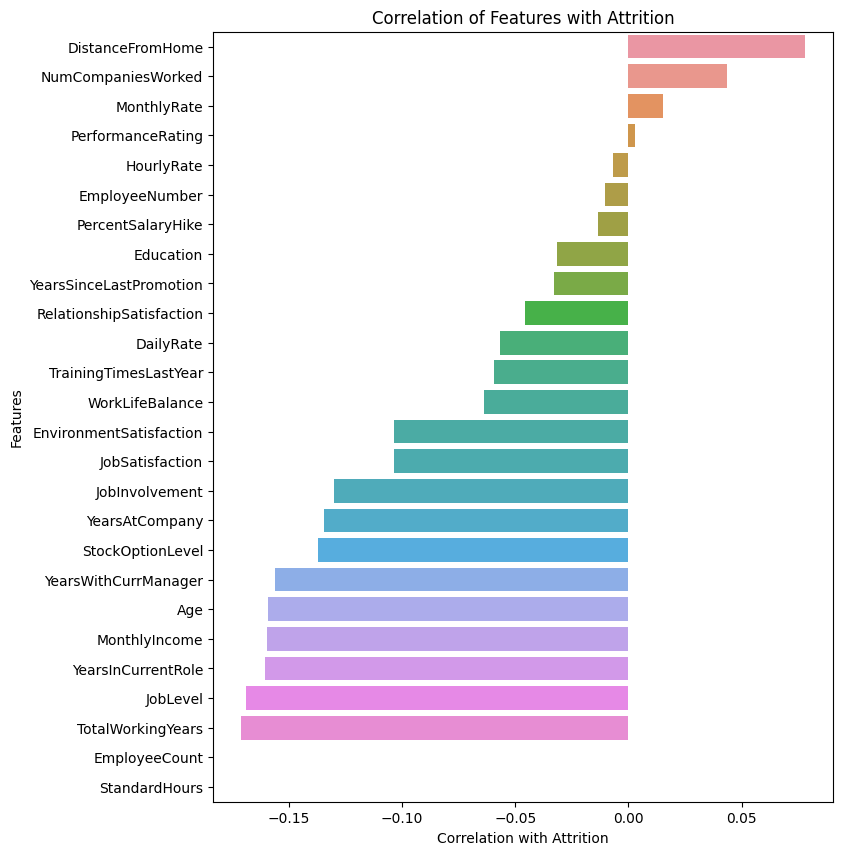

In [ ]:
# Plotting the correlations
plt.figure(figsize=(8, 10))
sns.barplot(y='Feature', x='Correlation_with_Attrition', data=target_correlation_df)
plt.title('Correlation of Features with Attrition')
plt.xlabel('Correlation with Attrition')
plt.ylabel('Features')
plt.show()

##### Interpretation:
1. Top 3 Highest Positive Correlations:
    - DistanceFromHome
    - NumCompaniesWorked
    - MonthlyRate
2. Top 3 Highest Negative Correlations:
    - TotalWorkingYears
    - JobLevel
    - YearsInCurrentRole

#### Validations

1. `DistanceFromHome`: Employees living farther from the workplace tend to have a higher rate of attrition.

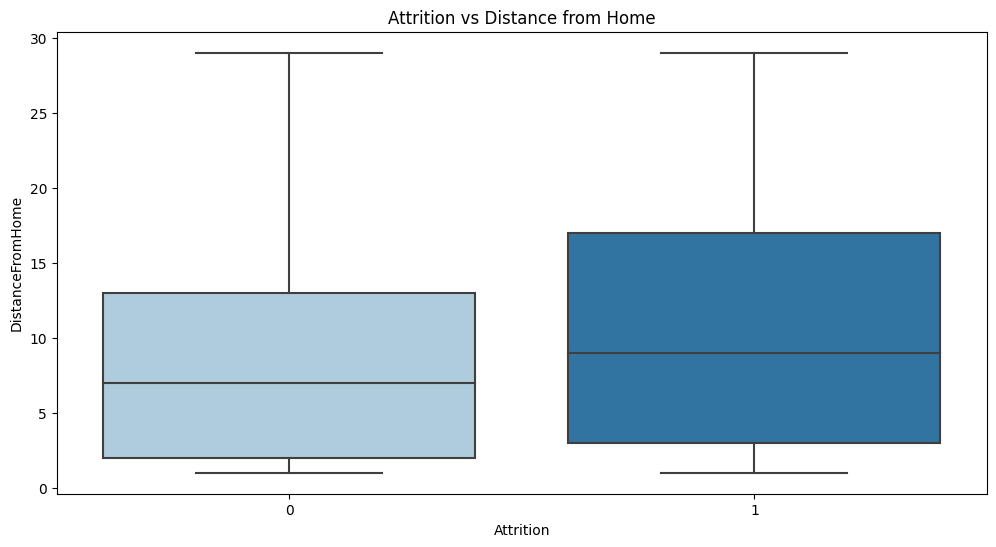

In [ ]:
custom_palette = sns.color_palette("Paired", 9)
sns.set_palette(custom_palette)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Attrition', y='DistanceFromHome', data=df)
plt.title('Attrition vs Distance from Home')
plt.show()

2. `JobRole`: Certain job roles may experience higher attrition rates, such as Sales Executives, Research Scientists, and Laboratory Technicians.

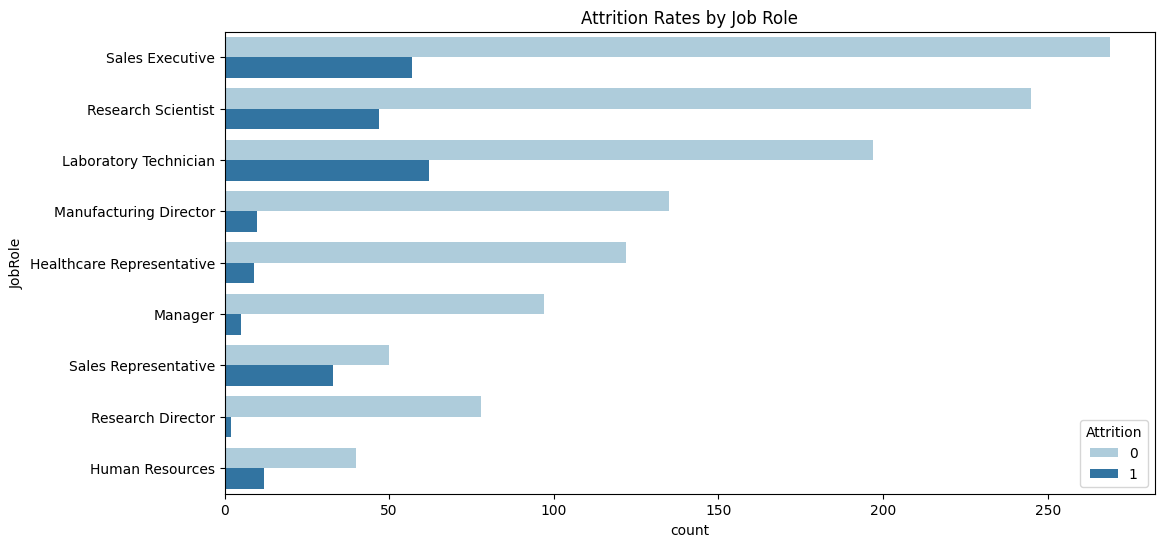

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(y='JobRole', hue='Attrition', data=df)
plt.title('Attrition Rates by Job Role')
plt.show()

3. `Age` : Younger employees appear to be more likely to leave.

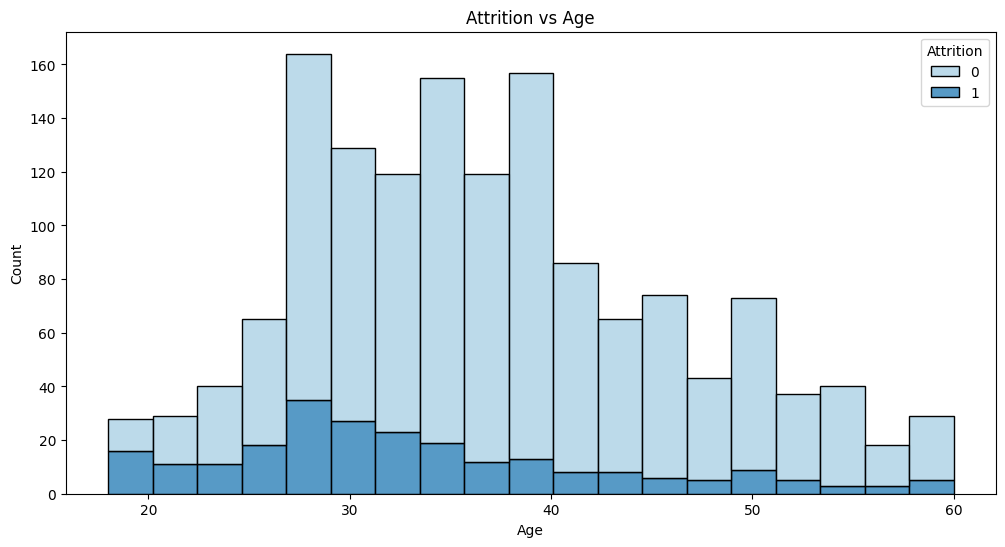

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', hue='Attrition', multiple='stack')
plt.title('Attrition vs Age')
plt.show()

4. `WorkLifeBalance`: A poor work-life balance leads to higher attrition.

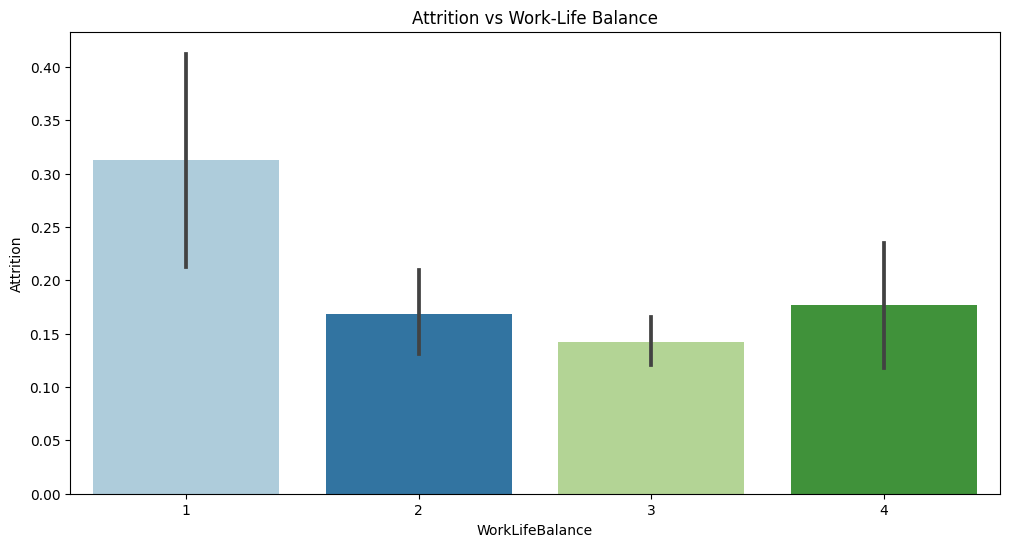

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='WorkLifeBalance', y='Attrition', data=df, estimator=lambda x: sum(x) / len(x))
plt.title('Attrition vs Work-Life Balance')
plt.show()

5. `MonthlyIncome`: Employees with lower monthly income seems to have higher attrition rates.

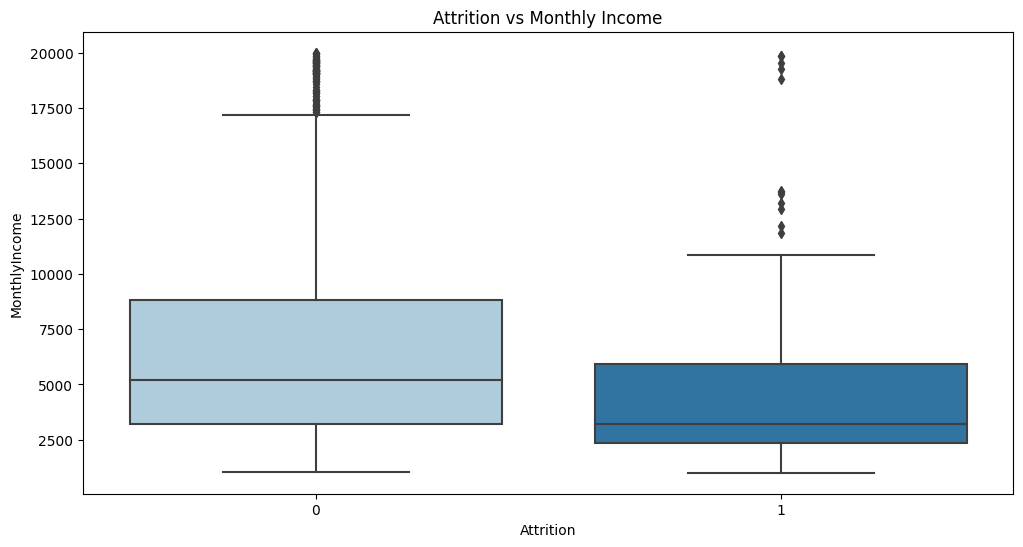

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Attrition vs Monthly Income')
plt.show()

6. `YearsAtCompany`: Employees with fewer years at the company are more prone to leaving.

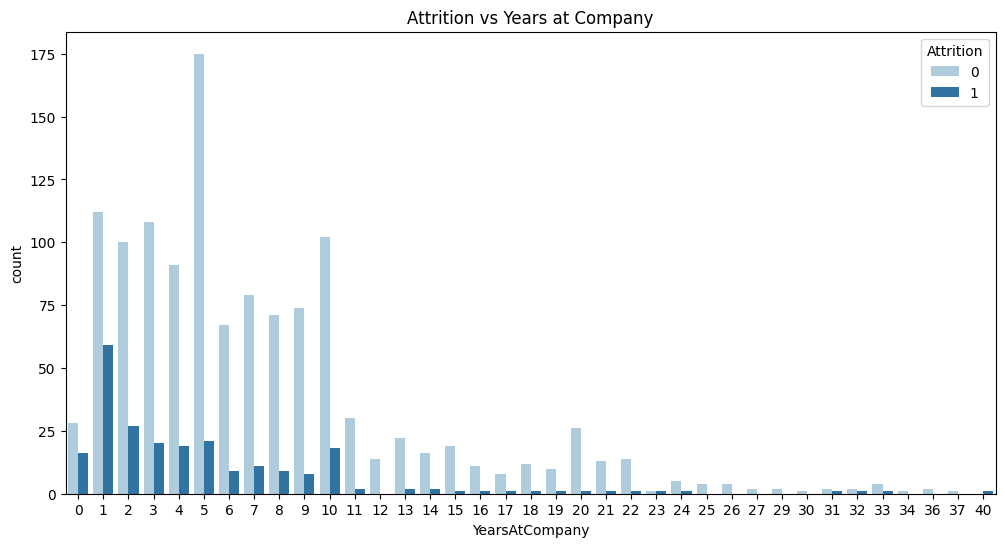

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='YearsAtCompany', hue='Attrition', data=df)
plt.title('Attrition vs Years at Company')
plt.show()

7. `JobSatisfaction`: Lower job satisfaction is correlated with higher attrition.

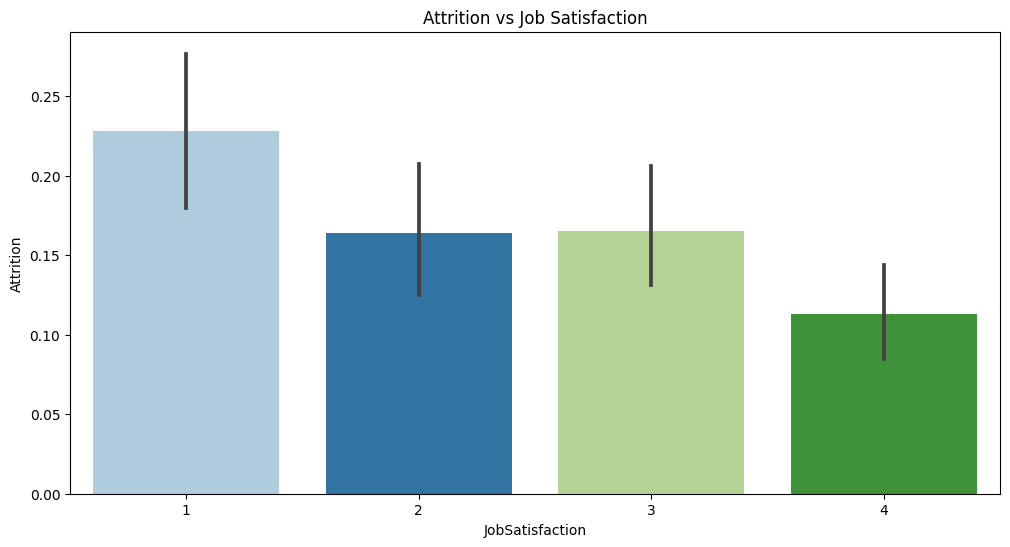

In [ ]:

plt.figure(figsize=(12, 6))
sns.barplot(x='JobSatisfaction', y='Attrition', data=df, estimator=lambda x: sum(x) / len(x))
plt.title('Attrition vs Job Satisfaction')
plt.show()

8. `OverTime`: There does not seem to be a strong relationship to validate the assumption regarding overtime.

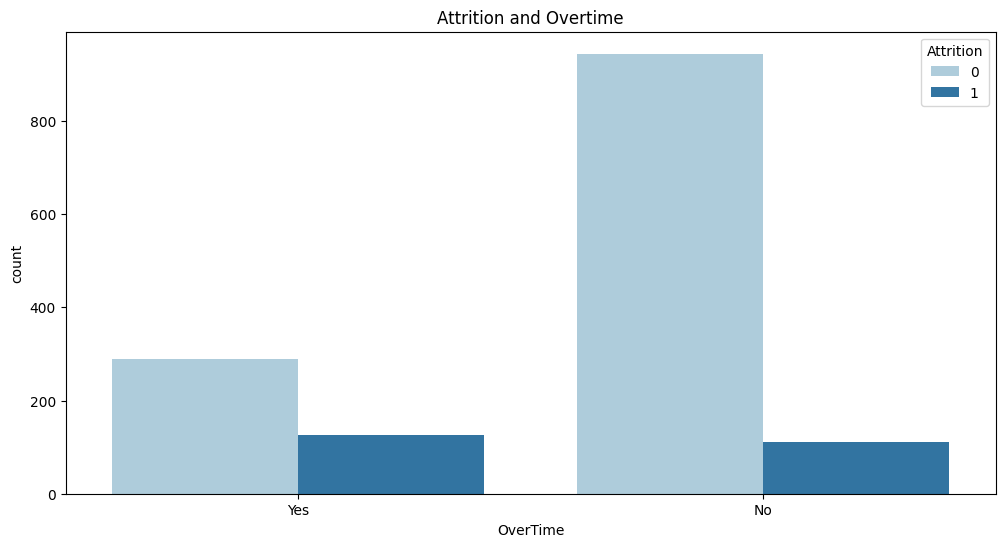

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title('Attrition and Overtime')
plt.show()

9. `MaritalStatus`: There are differences in attrition rates among different marital statuses; singles are more likely to leave the company, whereas divorced employees are less likely.

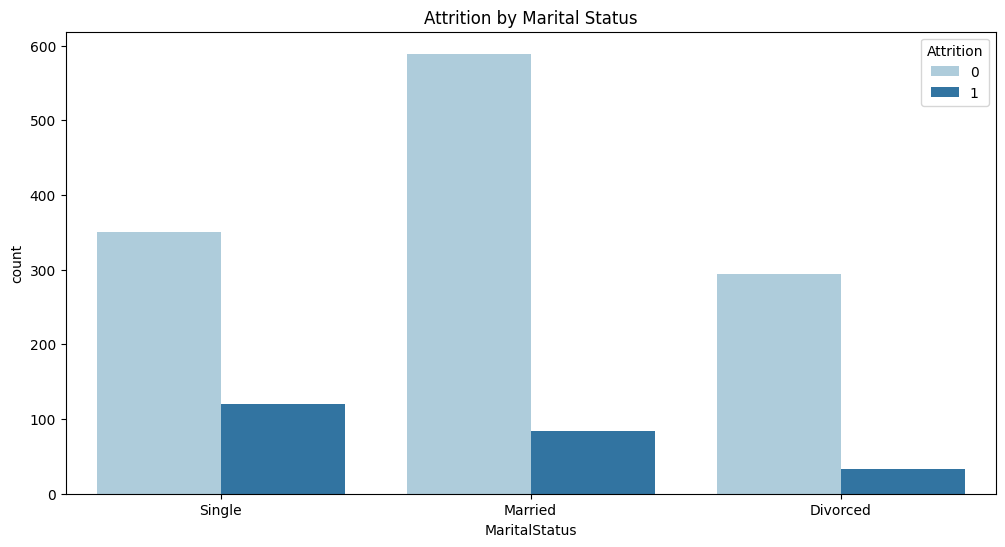

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='MaritalStatus', hue='Attrition', data=df)
plt.title('Attrition by Marital Status')
plt.show()

10. `Education`: The level of education influences attrition rates; employees with the highest education levels have the lowest attrition rates.

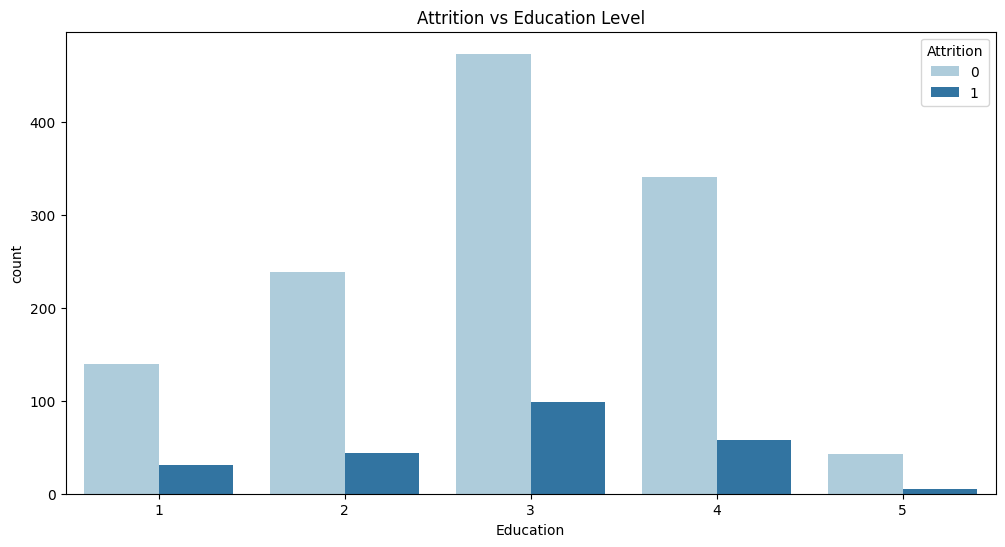

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Education', hue='Attrition', data=df)
plt.title('Attrition vs Education Level')
plt.show()

## 4. Data Preprocessing

#### Data Encoding

In [ ]:
# import dataset again
df = pd.read_csv("/content/HR_Analytics.csv.csv")
df.head(5)

# apply One-Hot Encoding for nominal data
one_hot_columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18']
df = pd.get_dummies(df, columns=one_hot_columns, drop_first=True)

# apply Label Encoding for ordinal data
label_encoder = LabelEncoder()
df['Attrition'] = label_encoder.fit_transform(df['Attrition'])
df['OverTime'] = label_encoder.fit_transform(df['OverTime'])

df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,94,3,...,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,1,2,3,61,2,...,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,1,4,4,92,2,...,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,56,3,...,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,7,1,40,3,...,0,1,0,0,0,0,0,0,1,0


#### Feature Scaling

In [ ]:
# identify numerical columns for scaling (excluding encoded and target variable)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('Attrition')

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
df.to_csv("cleaned_df.csv", index=False)

#### Data Partitioning

In [ ]:
# split the dataset into train and test dataset
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


# Specify the number of features to select
k_best_features = 20

# Initialize SelectKBest with the f_classif (ANOVA F-value) statistical test
feature_selector = SelectKBest(score_func=f_classif, k=k_best_features)

# Fit the feature selector to the data and transform the data
X_selected = feature_selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = feature_selector.get_support(indices=True)

# Print the selected feature indices
print("Selected feature indices:", selected_feature_indices)



Selected feature indices: [ 0  6  8  9 10 11 14 19 20 23 24 26 27 29 38 39 41 44 45 46]


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 4 18] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [ ]:
y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [ ]:
X

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,0.446350,0.742527,-1.010909,-0.891688,0.0,-1.701283,-0.660531,1.383138,0.379672,-0.057788,...,0,0,0,0,0,0,1,0,0,1
1,1.322365,-1.297775,-0.147150,-1.868426,0.0,-1.699621,0.254625,-0.240677,-1.026167,-0.057788,...,0,0,0,0,0,1,0,0,1,0
2,0.008343,1.414363,-0.887515,-0.891688,0.0,-1.696298,1.169781,1.284725,-1.026167,-0.961486,...,0,1,0,0,0,0,0,0,0,1
3,-0.429664,1.461466,-0.764121,1.061787,0.0,-1.694636,1.169781,-0.486709,0.379672,-0.961486,...,0,0,0,0,0,1,0,0,1,0
4,-1.086676,-0.524295,-0.887515,-1.868426,0.0,-1.691313,-1.575686,-1.274014,0.379672,-0.961486,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,0.202082,1.703764,-0.891688,0.0,1.721670,0.254625,-1.224807,1.785511,-0.057788,...,0,1,0,0,0,0,0,0,1,0
1466,0.227347,-0.469754,-0.393938,-1.868426,0.0,1.723332,1.169781,-1.175601,-1.026167,0.845911,...,0,0,0,0,0,0,0,0,1,0
1467,-1.086676,-1.605183,-0.640727,0.085049,0.0,1.726655,-0.660531,1.038693,1.785511,-0.057788,...,0,0,0,1,0,0,0,0,1,0
1468,1.322365,0.546677,-0.887515,0.085049,0.0,1.728317,1.169781,-0.142264,-1.026167,-0.057788,...,0,0,0,0,0,0,1,0,1,0


#### Data Balancing
As we have very few values of "Attrition = 1". The upcoming results ill be biased towards "Attrition = 0".
The primary purpose of SMOTE is to overcome the imbalance between the classes by generating synthetic examples of the minority class.

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.8 ,random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
len(X_resampled),len(y_resampled)

(2219, 2219)

In [ ]:
X_resampled.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,0.446350,0.742527,-1.010909,-0.891688,0.0,-1.701283,-0.660531,1.383138,0.379672,-0.057788,...,0,0,0,0,0,0,1,0,0,1
1,1.322365,-1.297775,-0.147150,-1.868426,0.0,-1.699621,0.254625,-0.240677,-1.026167,-0.057788,...,0,0,0,0,0,1,0,0,1,0
2,0.008343,1.414363,-0.887515,-0.891688,0.0,-1.696298,1.169781,1.284725,-1.026167,-0.961486,...,0,1,0,0,0,0,0,0,0,1
3,-0.429664,1.461466,-0.764121,1.061787,0.0,-1.694636,1.169781,-0.486709,0.379672,-0.961486,...,0,0,0,0,0,1,0,0,1,0
4,-1.086676,-0.524295,-0.887515,-1.868426,0.0,-1.691313,-1.575686,-1.274014,0.379672,-0.961486,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
y_resampled.to_csv("y.csv")

In [ ]:
y_resampled.value_counts()

0    1233
1     986
Name: Attrition, dtype: int64

In [ ]:
X_resampled.shape

(2219, 47)

#### Data Partitioning

In [ ]:
# Combine DataFrames horizontally (along columns)
combined_df = pd.concat([X_resampled, y_resampled], axis=1)

# Display the combined DataFrame
combined_df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,Attrition
0,0.446350,0.742527,-1.010909,-0.891688,0.0,-1.701283,-0.660531,1.383138,0.379672,-0.057788,...,0,0,0,0,0,1,0,0,1,1
1,1.322365,-1.297775,-0.147150,-1.868426,0.0,-1.699621,0.254625,-0.240677,-1.026167,-0.057788,...,0,0,0,0,1,0,0,1,0,0
2,0.008343,1.414363,-0.887515,-0.891688,0.0,-1.696298,1.169781,1.284725,-1.026167,-0.961486,...,1,0,0,0,0,0,0,0,1,1
3,-0.429664,1.461466,-0.764121,1.061787,0.0,-1.694636,1.169781,-0.486709,0.379672,-0.961486,...,0,0,0,0,1,0,0,1,0,0
4,-1.086676,-0.524295,-0.887515,-1.868426,0.0,-1.691313,-1.575686,-1.274014,0.379672,-0.961486,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
combined_df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,Attrition
Age,1.000000,0.032338,0.011789,0.221033,NaN,0.021533,0.010530,0.057819,0.100421,0.542974,...,-0.111459,0.270969,0.074107,0.187255,-0.086630,0.100897,-0.201784,0.125643,-0.154226,-0.235076
DailyRate,0.032338,1.000000,-0.042275,-0.036031,NaN,-0.061529,0.037441,0.026102,0.072638,0.008577,...,0.026005,-0.001606,0.007055,0.006603,0.006424,-0.000797,-0.011291,0.048371,-0.082520,-0.076177
DistanceFromHome,0.011789,-0.042275,1.000000,0.003332,NaN,0.035968,-0.022843,0.027742,0.009199,0.029308,...,-0.021560,-0.048841,-0.006472,-0.034279,-0.031030,0.056616,-0.051327,-0.005943,-0.017901,0.114678
Education,0.221033,-0.036031,0.003332,1.000000,NaN,0.075757,-0.043864,0.007386,0.070291,0.121699,...,-0.049372,0.023347,-0.004211,0.047892,0.002294,0.074999,-0.105365,-0.002708,-0.003958,-0.023120
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,0.021533,-0.061529,0.035968,0.075757,NaN,1.000000,0.009382,0.045971,0.017728,-0.003503,...,-0.040949,-0.032619,-0.018583,-0.021152,-0.031201,0.053643,0.011574,0.029019,-0.048330,0.012901
EnvironmentSatisfaction,0.010530,0.037441,-0.022843,-0.043864,NaN,0.009382,1.000000,-0.033399,0.029144,0.001013,...,0.000741,0.028173,0.073008,-0.015157,0.019023,-0.013807,0.022235,-0.001930,0.019090,-0.167230
HourlyRate,0.057819,0.026102,0.027742,0.007386,NaN,0.045971,-0.033399,1.000000,0.064138,-0.020147,...,0.010512,0.010506,-0.014475,-0.032305,0.027375,-0.021871,-0.037056,0.011303,-0.011613,0.002499
JobInvolvement,0.100421,0.072638,0.009199,0.070291,NaN,0.017728,0.029144,0.064138,1.000000,0.039831,...,0.016134,0.028368,0.006826,0.032543,0.040009,-0.000900,-0.055763,0.070710,-0.069296,-0.164627
JobLevel,0.542974,0.008577,0.029308,0.121699,NaN,-0.003503,0.001013,-0.020147,0.039831,1.000000,...,-0.288031,0.508286,0.138850,0.397855,-0.305813,0.230544,-0.211316,0.112138,-0.110948,-0.261926


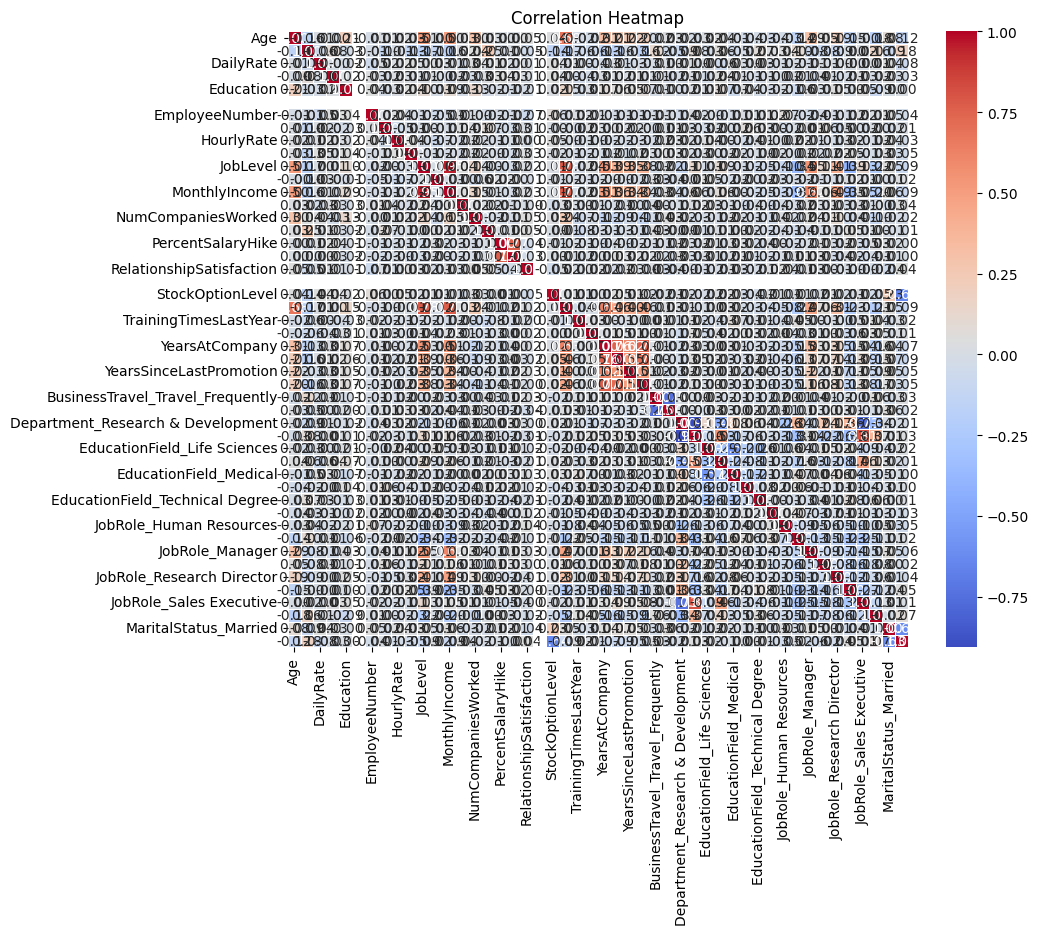

In [ ]:
import numpy as np

# Create a sample dataset (replace this with your actual data loading)
  # Continuous target variable
target_variable = "Attrition"
# Calculate the correlation matrix
correlation_matrix = np.corrcoef(combined_df)

# Extract the correlation between each feature and the target variable
correlation_with_target = correlation_matrix[:-1, -1]

# Print the results
# for i, corr in enumerate(correlation_with_target):
#     print(f"Correlation between Feature {i+1} and Target: {corr}")


plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.2, random_state=42)

#Best Features

In [ ]:
X_train.shape

(1775, 47)

## 6. Modeling

#### Decision Tree

In [ ]:
# train the basic Decision Tree model
decision_tree_basic = DecisionTreeClassifier(random_state=42)
decision_tree_basic.fit(X_train, y_train)

y_pred_basic = decision_tree_basic.predict(X_test)
print("Basic Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_basic))

conf_matrix_DT = confusion_matrix(y_test, y_pred_basic)
print("Confusion Matrix:\n", conf_matrix_DT)

f1_basic_dt = f1_score(y_test, y_pred_basic)
print("F1 Score - Basic Decision Tree:", f1_basic_dt)

accuracy = accuracy_score(y_test, y_pred_basic)
print(f"Accuracy: {accuracy:.4f}")

Basic Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       235
           1       0.87      0.86      0.86       209

    accuracy                           0.87       444
   macro avg       0.87      0.87      0.87       444
weighted avg       0.87      0.87      0.87       444

Confusion Matrix:
 [[209  26]
 [ 30 179]]
F1 Score - Basic Decision Tree: 0.8647342995169082
Accuracy: 0.8739


#### Decision: Tree Hyper-parameter tuning

In [ ]:
# define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# initialize the Decision Tree Classifier
decision_tree_tuned = DecisionTreeClassifier(random_state=42)

# perform Grid Search
grid_search = GridSearchCV(decision_tree_tuned, param_grid, scoring='f1', cv=5)
grid_search.fit(X_train, y_train)

# best parameters
print("Best parameters found: ", grid_search.best_params_)

# train and evaluate the tuned model
best_tree = grid_search.best_estimator_
y_pred_tuned = best_tree.predict(X_test)
print("Decision Tree with Hyperparameter Tuning Classification Report:")
print(classification_report(y_test, y_pred_tuned))

# calculate F1 Score for the tuned model
f1_tuned_dt = f1_score(y_test, y_pred_tuned)
print("F1 Score - Decision Tree with Hyperparameter Tuning:", f1_tuned_dt)

accuracy = accuracy_score(y_test, y_pred_tuned)
print(f"Accuracy: {accuracy:.4f}")

Best parameters found:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Decision Tree with Hyperparameter Tuning Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       235
           1       0.91      0.86      0.88       209

    accuracy                           0.89       444
   macro avg       0.89      0.89      0.89       444
weighted avg       0.89      0.89      0.89       444

F1 Score - Decision Tree with Hyperparameter Tuning: 0.8817733990147784
Accuracy: 0.8919


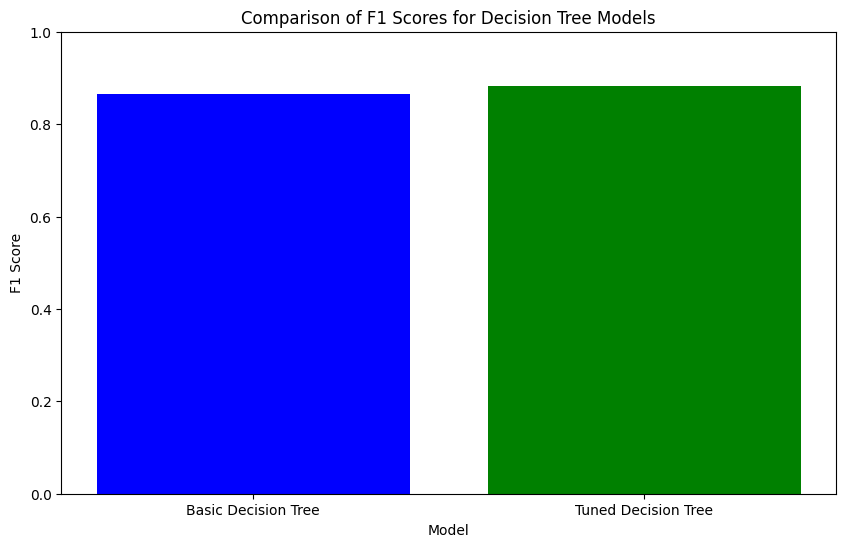

In [ ]:
# compare F1 Scores
models = ['Basic Decision Tree', 'Tuned Decision Tree']
f1_scores = [f1_basic_dt, f1_tuned_dt]

plt.figure(figsize=(10, 6))
plt.bar(models, f1_scores, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('Comparison of F1 Scores for Decision Tree Models')
plt.ylim([0, 1])
plt.show()

#### Logistic Regression

In [ ]:
# train the initial logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred_LR = logistic_model.predict(X_test)

print("Basic Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_LR))

Basic Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       235
           1       0.93      0.85      0.89       209

    accuracy                           0.90       444
   macro avg       0.90      0.89      0.90       444
weighted avg       0.90      0.90      0.90       444



In [ ]:
LR_accuracy = accuracy_score(y_test, y_pred_LR)
f1_LR = f1_score(y_test, y_pred_LR)
print("Accuracy of Logistic Regression: ", LR_accuracy)
print("F1_Score of Logistic Regression: ", f1_LR)

Accuracy of Logistic Regression:  0.8963963963963963
F1_Score of Logistic Regression:  0.8850000000000001


                              Feature  Coefficient
14                           OverTime     0.764160
23                     YearsAtCompany     0.528491
25            YearsSinceLastPromotion     0.502778
13                 NumCompaniesWorked     0.461647
2                    DistanceFromHome     0.284825
16                  PerformanceRating     0.141662
46               MaritalStatus_Single     0.060914
7                          HourlyRate     0.044209
5                      EmployeeNumber     0.029508
18                      StandardHours     0.000000
4                       EmployeeCount     0.000000
3                           Education    -0.014462
12                        MonthlyRate    -0.034127
27   BusinessTravel_Travel_Frequently    -0.045388
1                           DailyRate    -0.095292
9                            JobLevel    -0.104461
0                                 Age    -0.111798
11                      MonthlyIncome    -0.123456
36                        Gende

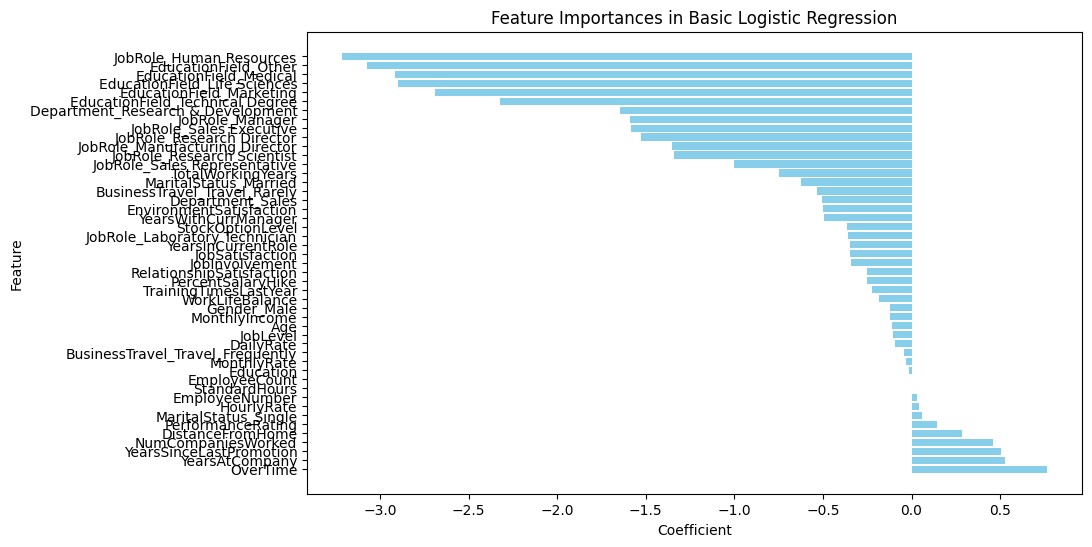

In [ ]:
# retrieve and display coefficients
coefficients = logistic_model.coef_[0]
feature_names = X_train.columns
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)
print(coefficients_df)

plt.figure(figsize=(10, 6))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importances in Basic Logistic Regression')
plt.show()

#### Logistic Regression: Attribute Selection

Forward Selection

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_sequential.py:211: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


Forward Selection Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       235
           1       0.91      0.80      0.85       209

    accuracy                           0.87       444
   macro avg       0.87      0.86      0.87       444
weighted avg       0.87      0.87      0.87       444

                              Feature  Coefficient
5                            OverTime     0.726922
8    BusinessTravel_Travel_Frequently     0.387889
0                    DistanceFromHome     0.215760
4                         MonthlyRate    -0.006960
22               MaritalStatus_Single    -0.038377
3                     JobSatisfaction    -0.321683
7                YearsWithCurrManager    -0.366519
6                    StockOptionLevel    -0.376502
2                            JobLevel    -0.414208
1             EnvironmentSatisfaction    -0.472760
21              MaritalStatus_Married    -0.732658


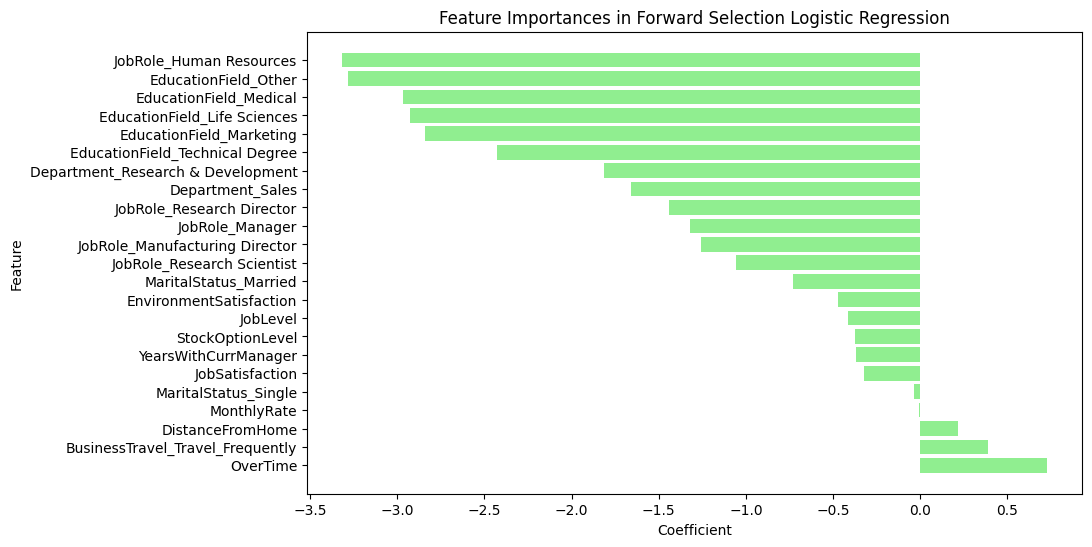

In [ ]:
# initialize logistic regression for forward selection
logistic_model_forward = LogisticRegression()
forward_selector = SequentialFeatureSelector(logistic_model_forward, direction='forward', scoring='f1')
forward_selector.fit(X_train, y_train)

# selected features
selected_features_forward = X_train.columns[forward_selector.get_support()]

# train and evaluate model with selected features
logistic_model_forward.fit(X_train[selected_features_forward], y_train)
y_pred_forward = logistic_model_forward.predict(X_test[selected_features_forward])
print("Forward Selection Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_forward))

# retrieve and display coefficients for forward selection model
coefficients_forward = logistic_model_forward.coef_[0]
coefficients_forward_df = pd.DataFrame({'Feature': selected_features_forward, 'Coefficient': coefficients_forward})
coefficients_forward_df = coefficients_forward_df.sort_values(by='Coefficient', ascending=False)
print(coefficients_forward_df)

# plotting coefficients for forward selection model
plt.figure(figsize=(10, 6))
plt.barh(coefficients_forward_df['Feature'], coefficients_forward_df['Coefficient'], color='lightgreen')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importances in Forward Selection Logistic Regression')
plt.show()

Backward Selection

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_sequential.py:211: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


Backward Selection Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       235
           1       0.91      0.81      0.86       209

    accuracy                           0.87       444
   macro avg       0.88      0.87      0.87       444
weighted avg       0.87      0.87      0.87       444

                              Feature  Coefficient
6                            OverTime     0.746574
5                  NumCompaniesWorked     0.326879
1                    DistanceFromHome     0.258921
8                     WorkLifeBalance    -0.177557
9                  YearsInCurrentRole    -0.297842
3                      JobInvolvement    -0.337687
7                    StockOptionLevel    -0.350510
4                     JobSatisfaction    -0.350657
0                                 Age    -0.375015
2             EnvironmentSatisfaction    -0.433585
22              MaritalStatus_Married    -0.599890

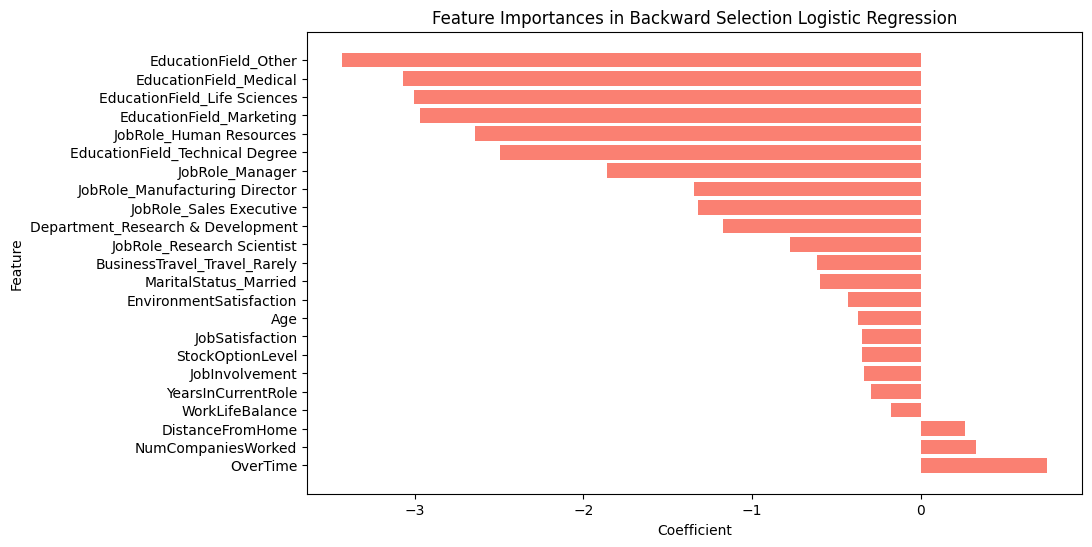

In [ ]:
# initialize logistic regression for backward selection
logistic_model_backward = LogisticRegression()
backward_selector = SequentialFeatureSelector(logistic_model_backward, direction='backward', scoring='f1')
backward_selector.fit(X_train, y_train)

# selected features
selected_features_backward = X_train.columns[backward_selector.get_support()]

# train and evaluate model with selected features
logistic_model_backward.fit(X_train[selected_features_backward], y_train)
y_pred_backward = logistic_model_backward.predict(X_test[selected_features_backward])
print("Backward Selection Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_backward))

# retrieve and display coefficients for backward selection model
coefficients_backward = logistic_model_backward.coef_[0]
coefficients_backward_df = pd.DataFrame({'Feature': selected_features_backward, 'Coefficient': coefficients_backward})
coefficients_backward_df = coefficients_backward_df.sort_values(by='Coefficient', ascending=False)
print(coefficients_backward_df)

# plotting coefficients for backward selection model
plt.figure(figsize=(10, 6))
plt.barh(coefficients_backward_df['Feature'], coefficients_backward_df['Coefficient'], color='salmon')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importances in Backward Selection Logistic Regression')
plt.show()

F1 Score - Basic Logistic Regression: 0.8647342995169082
F1 Score - Forward Selection: 0.8498727735368956
F1 Score - Backward Selection: 0.8556962025316456


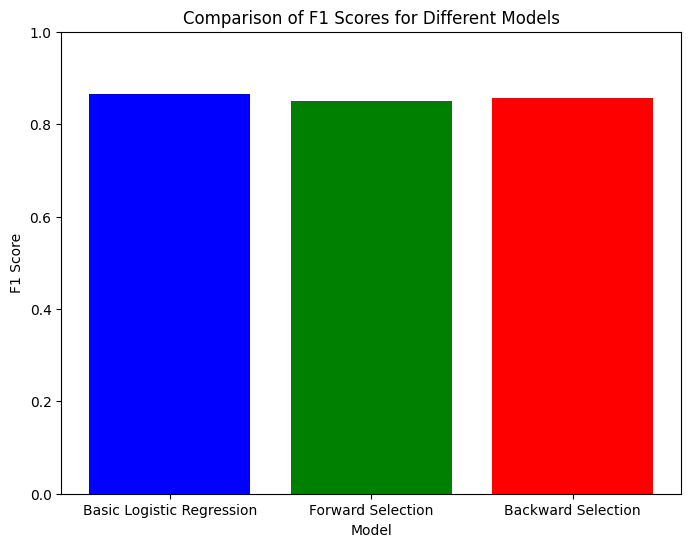

In [ ]:
# F1 Score for Basic Logistic Regression
f1_basic = f1_score(y_test, y_pred_basic)

# F1 Score for Forward Selection Model
f1_forward = f1_score(y_test, y_pred_forward)

# F1 Score for Backward Selection Model
f1_backward = f1_score(y_test, y_pred_backward)

print("F1 Score - Basic Logistic Regression:", f1_basic)
print("F1 Score - Forward Selection:", f1_forward)
print("F1 Score - Backward Selection:", f1_backward)

models = ['Basic Logistic Regression', 'Forward Selection', 'Backward Selection']
f1_scores = [f1_basic, f1_forward, f1_backward]

plt.figure(figsize=(8, 6))
plt.bar(models, f1_scores, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('Comparison of F1 Scores for Different Models')
plt.ylim([0, 1])  # F1 score range is 0 to 1
plt.show()

#### SVM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Create SVM model
svm_model = SVC(kernel='linear')  # You can choose different kernels (linear, radial basis function, etc.)

# Train the model
svm_model.fit(X_train, y_train)
y_pred_SVM = svm_model.predict(X_test)

In [ ]:
# Evaluate the model
f1_SVM = f1_score(y_test, y_pred_SVM)
SVM_accuracy = accuracy_score(y_test, y_pred_SVM)
confusion_mat_SVM = confusion_matrix(y_test, y_pred_SVM)
classification_rep_SVM = classification_report(y_test, y_pred_SVM)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion_mat_SVM}')
print(f'Classification Report:\n{classification_rep_SVM}')


Accuracy: 0.8918918918918919
Confusion Matrix:
[[226   9]
 [ 32 177]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       235
           1       0.95      0.85      0.90       209

    accuracy                           0.91       444
   macro avg       0.91      0.90      0.91       444
weighted avg       0.91      0.91      0.91       444



In [ ]:
# Example of using a different kernel (RBF kernel)
svm_model_rbf = SVC(kernel='rbf')
svm_model_rbf.fit(X_train, y_train)
y_pred_rbf = svm_model_rbf.predict(X_test)

# Evaluate the model
SVM_rbf_accuracy = accuracy_score(y_test, y_pred_rbf)
confusion_mat_SVM_rbf = confusion_matrix(y_test, y_pred_rbf)
classification_rep_SVM_rbf = classification_report(y_test, y_pred_rbf)



print(f'Accuracy: {SVM_rbf_accuracy}')
print(f'Confusion Matrix:\n{confusion_mat_SVM_rbf}')
print(f'Classification Report:\n{classification_rep_SVM_rbf}')

Accuracy: 0.9279279279279279
Confusion Matrix:
[[226   9]
 [ 23 186]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       235
           1       0.95      0.89      0.92       209

    accuracy                           0.93       444
   macro avg       0.93      0.93      0.93       444
weighted avg       0.93      0.93      0.93       444



#### SVM: Hyper-parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, f1_score

# Define your SVM model
svm_model = SVC()

# Define the hyperparameters and their possible values to search
param_grid = {
    'C': [0.1, 1, 10, 100],             # Regularization parameter
    'kernel': ['linear', 'rbf'],       # Kernel type
    'gamma': ['scale', 'auto', 0.1, 1]  # Kernel coefficient (for 'rbf' kernel)
}

# Use F1-score as the scoring metric for tuning
scorer = make_scorer(f1_score, pos_label=1)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to your data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params_SVM = grid_search.best_params_
best_svm_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params_SVM)

# Evaluate the model on the test set
y_pred_SVM_tuned = best_svm_model.predict(X_test)
f1_SVM_tuned = f1_score(y_test, y_pred_SVM_tuned)
SVM_tuned_accuracy = accuracy_score(y_test, y_pred_SVM_tuned)

print("Accuracy SVM Tuned: ", SVM_tuned_accuracy)
print(f"F1-score on Test Set (tuned model): {f1_SVM_tuned}")


Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy SVM Tuned:  0.9774774774774775
F1-score on Test Set (tuned model): 0.9759615384615384


In [ ]:
# Generate the classification report
classification_rep_tuned = classification_report(y_test, y_pred_SVM_tuned)
print("Classification Report (Tuned Model):")
print(classification_rep_tuned)

# Generate the confusion matrix
confusion_mat_SVM_tuned = confusion_matrix(y_test, y_pred_SVM_tuned)
print("\nConfusion Matrix (Tuned Model):")
print(confusion_mat_SVM_tuned)

# Calculate accuracy
accuracy_SVM_tuned = accuracy_score(y_test, y_pred_SVM_tuned)
print(f"\nAccuracy (Tuned Model): {accuracy_SVM_tuned}")


Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       235
           1       0.98      0.97      0.98       209

    accuracy                           0.98       444
   macro avg       0.98      0.98      0.98       444
weighted avg       0.98      0.98      0.98       444


Confusion Matrix (Tuned Model):
[[231   4]
 [  6 203]]

Accuracy (Tuned Model): 0.9774774774774775


In [ ]:
# Predicting probabilities
probabilities = best_svm_model.predict_proba(X_test)
probabilities[:,1]

AttributeError: ignored

#### Neural Networks

In [ ]:
neural_network = MLPClassifier()
neural_network.fit(X_train, y_train)
y_pred_NN = neural_network.predict(X_test)
f1_NN = f1_score(y_test, y_pred_NN)
NN_accuracy = accuracy_score(y_test, y_pred_NN)

print("Accuracy of NN: ", NN_accuracy)
print("\nNeural Network Classification Report:")
print(classification_report(y_test, y_pred_NN))

Accuracy of NN:  0.9031531531531531

Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       235
           1       0.88      0.92      0.90       209

    accuracy                           0.90       444
   macro avg       0.90      0.90      0.90       444
weighted avg       0.90      0.90      0.90       444



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### Neural Networks: Hyper-parameter tuning

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define your MLPClassifier
neural_network = MLPClassifier()

# Define the hyperparameters and their possible values for tuning
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(neural_network, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model from the grid search
best_neural_network = grid_search.best_estimator_

# Make predictions on the test set
y_pred_NN_tuned = best_neural_network.predict(X_test)
f1_NN_tuned = f1_score(y_test,y_pred_NN_tuned)
NN_tuned_accuracy = accuracy_score(y_test,y_pred_NN_tuned)

# Print the classification report
print("Accuracy NN_Tuned: ", NN_tuned_accuracy)
print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_NN_tuned))


Best Hyperparameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Accuracy NN_Tuned:  0.9324324324324325
Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       235
           1       0.92      0.94      0.93       209

    accuracy                           0.93       444
   macro avg       0.93      0.93      0.93       444
weighted avg       0.93      0.93      0.93       444



#### Naïve Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Create a Gaussian Naive Bayes model
nb_model = GaussianNB()

# Train the model using the training sets
nb_model.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred_NB = nb_model.predict(X_test)

# Evaluating the model
f1_NB = f1_score(y_test, y_pred_NB)
NB_accuracy = accuracy_score(y_test, y_pred_NB)
report = classification_report(y_test, y_pred_NB)

print("F1_score: ",f1_NB)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model using the training sets
rf_model.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred_RF = rf_model.predict(X_test)

# Evaluating the model
RF_accuracy = accuracy_score(y_test, y_pred_RF)
f1_RF = f1_score(y_test, y_pred_RF)

report_RF = classification_report(y_test, y_pred_RF)
print("F1_Score RF: ", f1_RF)
print("Accuracy:", RF_accuracy)
print("Classification Report:")
print(report_RF)

#### Random Forest: Hyper-parameter tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in random forest
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
    'max_depth': [10, 20, 30, None],   # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],     # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]         # Method of selecting samples for training each tree
}

# Create a base model
rf = RandomForestClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Use the best estimator to make predictions
best_rf = grid_search.best_estimator_
y_pred_RF_tuned = best_rf.predict(X_test)

# Evaluating the model
RF_tuned_accuracy = accuracy_score(y_test, y_pred_RF_tuned)
f1_RF_tuned = f1_score(y_test, y_pred_RF_tuned)
report_RF_tuned = classification_report(y_test, y_pred_RF_tuned)

print("F1_Score RF_tuned: ",f1_RF_tuned)
print("Accuracy:", RF_tuned_accuracy)
print("Classification Report:")
print(report_RF_tuned)

#### Ensemble Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define base models
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(random_state=42)
svc = SVC(random_state=42)

# Define a voting classifier
ensemble = VotingClassifier(estimators=[
    ('rf', rf),
    ('lr', lr),
    ('svc', svc)
], voting='hard')

# Define the parameter grid
param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [10, 20],
    'lr__C': [0.1, 1, 10],
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf']
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=ensemble, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Use the best estimator to make predictions
best_ensemble = grid_search.best_estimator_
y_pred_Ensemble = best_ensemble.predict(X_test)

# Evaluating the model
Ensemble_accuracy = accuracy_score(y_test, y_pred_Ensemble)
f1_Ensamble = f1_score(y_test, y_pred_Ensemble)
report_Ensemble = classification_report(y_test, y_pred_Ensemble)

print("F1 Score Ensemble: ", f1_Ensamble)
print("Accuracy:", Ensemble_accuracy)
print("Classification Report:")
print(report_Ensemble)

#### Gradient Boosting

In [ ]:
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.6, max_depth=3, random_state=42)
gb_classifier.fit(X_train, y_train)
y_pred_GB = gb_classifier.predict(X_test)
GB_accuracy = accuracy_score(y_test, y_pred_GB)
classification_rep_GB = classification_report(y_test, y_pred_GB)
f1_GB = f1_score(y_test, y_pred_GB)

print("F1 Score GB: ", f1_GB)
print(f"Accuracy_GB: {GB_accuracy}")
print("Classification Report_GB:\n", classification_rep_GB)

#### Gradient Boosting: Hyper-parameter tuning

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Gradient Boosting classifier
grad_boost_classifier = GradientBoostingClassifier(random_state=42)

# Define a parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.2, 0.4, 0.6, 0.8],
    'max_depth': [3, 5, 7],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=grad_boost_classifier, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params_GB_tuned = grid_search.best_params_

# Train the model with the best parameters
best_grad_boost_classifier = GradientBoostingClassifier(random_state=42, **best_params_GB_tuned)
best_grad_boost_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_GB_tuned = best_grad_boost_classifier.predict(X_test)

# Evaluate the model
GB_tuned_accuracy = accuracy_score(y_test, y_pred_GB_tuned)
f1_GB_tuned = f1_score(y_test, y_pred_GB_tuned)

print(f"Accuracy: {GB_tuned_accuracy:.4f}")
print("Best Hyperparameters:", best_params_GB_tuned)
print("Classification Report GBT:\n", classification_report(y_test, y_pred_GB_tuned))

#### XGBoosting: Hyper-parameter tuning

In [ ]:
# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Define a parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params_XGB_tuned = grid_search.best_params_

# Train the model with the best parameters
best_xgb_classifier = XGBClassifier(random_state=42, **best_params_XGB_tuned)
best_xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_XGB_tuned = best_xgb_classifier.predict(X_test)
classification_rep_XGB_tuned = classification_report(y_test, y_pred_XGB_tuned)

# Evaluate the model
XGB_tuned_accuracy = accuracy_score(y_test, y_pred_XGB_tuned)
conf_matrix_XGB_tuned = confusion_matrix(y_test, y_pred_XGB_tuned)
f1_XGB_tuned = f1_score(y_test, y_pred_XGB_tuned)

print("F1_Score: ", f1_XGB_tuned)
print("Confusion Matrix kNN Hyperparameter:\n", conf_matrix_XGB_tuned)
print(f"Accuracy: {XGB_tuned_accuracy:.4f}")
print("Best Hyperparameters:", best_params_XGB_tuned)
print("Classification Report_GB:\n", classification_rep_XGB_tuned)


#With Feature Selection

#### kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=3)

knn_classifier.fit(X_train, y_train)

y_pred_knn = knn_classifier.predict(X_test)

kNN_accuracy = accuracy_score(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
f1_kNN = f1_score(y_test, y_pred_knn)

print("F1_Score: ", f1_kNN)
print("Confusion Matrix kNN Hyperparameter:\n", conf_matrix_knn)
print(f"Accuracy_knn: {kNN_accuracy}")
print("Classification Report_knn:\n", classification_rep_knn)


#### kNN: Hyper-parameter tuning

In [ ]:
# Initialize the k-NN classifier
knn_classifier = KNeighborsClassifier()

# Define a parameter grid for grid search
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params_kNN_tuned = grid_search.best_params_

# Train the model with the best parameters
best_knn_classifier = KNeighborsClassifier(**best_params_kNN_tuned)
best_knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_kNN_tuned = best_knn_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred_kNN_tuned)

# Evaluate the model
kNN_tuned_accuracy = accuracy_score(y_test, y_pred_kNN_tuned)
f1_kNN_tuned = f1_score(y_test, y_pred_kNN_tuned)

print("F1 Score kNN Tuned: ", f1_kNN_tuned)
print("Confusion Matrix:\n ",cm)
print(f"Accuracy: {kNN_tuned_accuracy:.4f}")
print("Best Hyperparameters:", best_params_kNN_tuned)
print("Classification Report:\n", classification_report(y_test, y_pred_kNN_tuned))


In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_kNN_tuned)

# Create a DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 7. Evaluation

#### Results of All Models

In [ ]:
#Accuracies
DT_accuracy = accuracy_score(y_test, y_pred_basic)
DTT_accuracy = accuracy_score(y_test, y_pred_tuned)
LR_accuracy = accuracy_score(y_test, y_pred_LR)
Fwd_accuracy = accuracy_score(y_test,y_pred_forward)
Bwd_accuracy = accuracy_score(y_test, y_pred_backward)
SVM_accuracy = accuracy_score(y_test, y_pred_SVM)
NN_accuracy = accuracy_score(y_test, y_pred_NN)
NN_tuned_accuracy = accuracy_score(y_test,y_pred_NN_tuned)
NB_accuracy = accuracy_score(y_test, y_pred_NB)
RF_accuracy = accuracy_score(y_test, y_pred_RF)
RF_tuned_accuracy = accuracy_score(y_test, y_pred_RF_tuned)
Ensemble_accuracy = accuracy_score(y_test, y_pred_Ensemble)
GB_accuracy = accuracy_score(y_test, y_pred_GB)
GB_tuned_accuracy = accuracy_score(y_test, y_pred_GB_tuned)
XGB_tuned_accuracy = accuracy_score(y_test, y_pred_XGB_tuned)
kNN_accuracy = accuracy_score(y_test, y_pred_knn)
kNN_tuned_accuracy = accuracy_score(y_test, y_pred_kNN_tuned)
SVM_tuned_accuracy = accuracy_score(y_test, y_pred_SVM_tuned)

#F1_Scores
f1_SVM_tuned = f1_score(y_test, y_pred_SVM_tuned)
f1_SVM = f1_score(y_test, y_pred_SVM)
f1_SVM_tuned = f1_score(y_test, y_pred_SVM_tuned)
f1_kNN_tuned = f1_score(y_test, y_pred_kNN_tuned)
f1_kNN = f1_score(y_test, y_pred_knn)
f1_XGB_tuned = f1_score(y_test, y_pred_XGB_tuned)
f1_GB_tuned = f1_score(y_test, y_pred_GB_tuned)
f1_GB = f1_score(y_test, y_pred_GB)
f1_Ensemble = f1_score(y_test, y_pred_Ensemble)
f1_RF_tuned = f1_score(y_test, y_pred_RF_tuned)
f1_RF = f1_score(y_test, y_pred_RF)
f1_NB = f1_score(y_test, y_pred_NB)
f1_NN_tuned = f1_score(y_test,y_pred_NN_tuned)
f1_NN = f1_score(y_test, y_pred_NN)
f1_forward = f1_score(y_test, y_pred_forward)
f1_backward = f1_score(y_test, y_pred_backward)
f1_LR = f1_score(y_test, y_pred_LR)
f1_tuned_dt = f1_score(y_test, y_pred_tuned)
f1_basic_dt = f1_score(y_test, y_pred_basic)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Accuracy
accuracies = [DT_accuracy, DTT_accuracy, LR_accuracy, Fwd_accuracy, Bwd_accuracy, SVM_accuracy,
              NN_accuracy, NN_tuned_accuracy, NB_accuracy, RF_accuracy, RF_tuned_accuracy,
              Ensemble_accuracy, GB_accuracy, GB_tuned_accuracy, XGB_tuned_accuracy,
              kNN_accuracy, kNN_tuned_accuracy, SVM_tuned_accuracy]

# F1 scores
f1_scores = [f1_basic_dt, f1_tuned_dt, f1_LR, f1_forward, f1_backward, f1_SVM, f1_NN, f1_NN_tuned,
              f1_NB, f1_RF, f1_RF_tuned, f1_Ensemble, f1_GB, f1_GB_tuned, f1_XGB_tuned,
              f1_kNN, f1_kNN_tuned, f1_SVM_tuned]
#Model Names
models = ['Decision Tree', 'Tuned Decision Tree', 'Logistic Regression', 'Forward Selection',
          'Backward Elimination', 'SVM', 'Neural Network', 'Tuned NN', 'Naive Bayes',
          'Random Forest', 'Tuned RF', 'Ensemble', 'Gradient Boosting', 'Tuned GB',
          'Tuned XGBoost', 'k-NN', 'Tuned k-NN','Tuned SVM']
# Ensure lengths match
if len(accuracies) != len(f1_scores) != len(models):
    raise ValueError("Lengths of accuracy, F1 score, and model name lists do not match.")

# Create figure and axes
fig, ax = plt.subplots()

# Bar width (adjust as needed)
bar_width = 0.40
bar_colors = ["blue", "green"]
# Create an array to represent the x-axis positions
index = np.arange(len(models))

# Plotting accuracy as horizontal bars
bar1 = ax.barh(index, accuracies, bar_width, label='Accuracy', color='thistle')

# Plotting F1 scores as horizontal bars next to accuracy
bar2 = ax.barh(index + bar_width, f1_scores, bar_width, label='F1 Score', color='lightgreen')

# Labeling
ax.set_xlabel('Scores')
ax.set_title('Accuracy and F1 Score Comparison')
ax.set_yticks(index + bar_width / 2)
ax.set_yticklabels(models)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Accuracy
accuracies = [DT_accuracy, DTT_accuracy, LR_accuracy, Fwd_accuracy, Bwd_accuracy, SVM_accuracy,
              NN_accuracy, NN_tuned_accuracy, NB_accuracy, RF_accuracy, RF_tuned_accuracy,
              Ensemble_accuracy, GB_accuracy, GB_tuned_accuracy, XGB_tuned_accuracy,
              kNN_accuracy, kNN_tuned_accuracy, SVM_tuned_accuracy]

# F1 scores
f1_scores = [f1_basic_dt, f1_tuned_dt, f1_LR, f1_forward, f1_backward, f1_SVM, f1_NN, f1_NN_tuned,
              f1_NB, f1_RF, f1_RF_tuned, f1_Ensemble, f1_GB, f1_GB_tuned, f1_XGB_tuned,
              f1_kNN, f1_kNN_tuned, f1_SVM_tuned]
#Model Names
models = ['Decision Tree', 'Tuned Decision Tree', 'Logistic Regression', 'Forward Selection',
          'Backward Elimination', 'SVM', 'Neural Network', 'Tuned NN', 'Naive Bayes',
          'Random Forest', 'Tuned RF', 'Ensemble', 'Gradient Boosting', 'Tuned GB',
          'Tuned XGBoost', 'k-NN', 'Tuned k-NN','Tuned SVM']

# Ensure lengths match
if len(accuracies) != len(f1_scores) != len(models):
    raise ValueError("Lengths of accuracy, F1 score, and model name lists do not match.")

# Create figure and axes
fig, ax = plt.subplots()

# Bar height (adjust as needed)
bar_height = 0.35

# Create an array to represent the y-axis positions
index = np.arange(len(models))

# Plotting accuracy as vertical bars
bar1 = ax.bar(index, accuracies, bar_height, label='Accuracy', color='thistle')

# Plotting F1 scores as vertical bars next to accuracy
bar2 = ax.bar(index + bar_height, f1_scores, bar_height, label='F1 Score', color='lightgreen')

# Labeling
ax.set_ylabel('Scores')
ax.set_title('Accuracy and F1 Score Comparison')
ax.set_xticks(index + bar_height / 2)
ax.set_xticklabels(models)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Accuracy
accuracies = [DT_accuracy, DTT_accuracy, LR_accuracy, Fwd_accuracy, Bwd_accuracy, SVM_accuracy,
              NN_accuracy, NN_tuned_accuracy, NB_accuracy, RF_accuracy, RF_tuned_accuracy,
              Ensemble_accuracy, GB_accuracy, GB_tuned_accuracy, XGB_tuned_accuracy,
              kNN_accuracy, kNN_tuned_accuracy, SVM_tuned_accuracy]

# F1 scores
f1_scores = [f1_basic_dt, f1_tuned_dt, f1_LR, f1_forward, f1_backward, f1_SVM, f1_NN, f1_NN_tuned,
              f1_NB, f1_RF, f1_RF_tuned, f1_Ensemble, f1_GB, f1_GB_tuned, f1_XGB_tuned,
              f1_kNN, f1_kNN_tuned, f1_SVM_tuned]
#Model Names
models = ['Decision Tree', 'Tuned Decision Tree', 'Logistic Regression', 'Forward Selection',
          'Backward Elimination', 'SVM', 'Neural Network', 'Tuned NN', 'Naive Bayes',
          'Random Forest', 'Tuned RF', 'Ensemble', 'Gradient Boosting', 'Tuned GB',
          'Tuned XGBoost', 'k-NN', 'Tuned k-NN','Tuned SVM']

# Ensure lengths match
if len(accuracies) != len(f1_scores) != len(models):
    raise ValueError("Lengths of accuracy, F1 score, and model name lists do not match.")

# Split the models into groups of six
model_groups = [models[i:i + 6] for i in range(0, len(models), 6)]

# Create subplots
num_groups = len(model_groups)
fig, axs = plt.subplots(num_groups, figsize=(12, 4 * num_groups))

# Iterate through model groups
for i, group in enumerate(model_groups):
    # Data for the current group
    group_accuracies = accuracies[i * 6: (i + 1) * 6]
    group_f1_scores = f1_scores[i * 6: (i + 1) * 6]

    # Bar height (adjust as needed)
    bar_height = 0.35

    # Create an array to represent the y-axis positions
    index = np.arange(len(group))

    # Plotting accuracy as horizontal bars
    axs[i].barh(index, group_accuracies, bar_height, label='Accuracy', color='lightgreen')

    # Plotting F1 scores as horizontal bars next to accuracy
    axs[i].barh(index + bar_height, group_f1_scores, bar_height, label='F1 Score', color='thistle')

    # Labeling
    axs[i].set_ylabel('Scores')
    axs[i].set_title(f'Accuracy and F1 Score Comparison - Group {i+1}')
    axs[i].set_yticks(index + bar_height / 2)
    axs[i].set_yticklabels(group)
    axs[i].legend()

# Display the plot
plt.tight_layout()
plt.show()


#Feature Selection

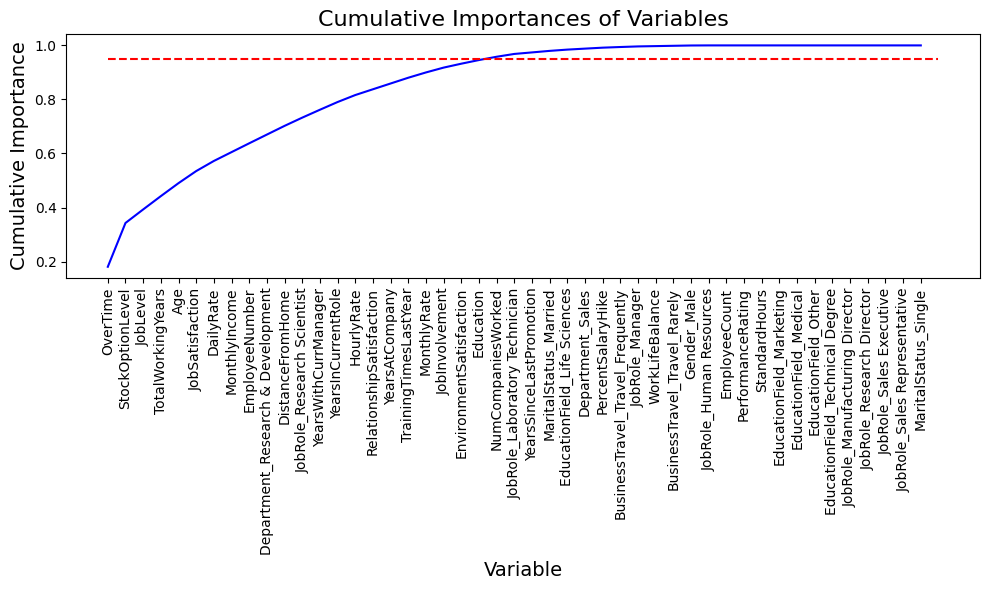

('JobRole_Laboratory Technician', 0.9683892825796894)

In [ ]:
specified_columns  = df.drop("Attrition",axis=1)
# Initialize the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
dt_classifier.fit(X_train, y_train)

# Get feature importances
importances = dt_classifier.feature_importances_

# Combine importances with column names
importance_dict = dict(zip(specified_columns, importances))

# Sort the importances
sorted_importance = sorted(importance_dict.items(), key=lambda item: item[1], reverse=True)

import numpy as np
import matplotlib.pyplot as plt

# Extract the importances and the corresponding features
features = [f[0] for f in sorted_importance]
importances = [f[1] for f in sorted_importance]

# Calculate the cumulative importance
cumulative_importances = np.cumsum(importances)

# Make a line graph of the importances
plt.figure(figsize=(10, 6))
plt.plot(range(len(importances)), cumulative_importances, 'b-')

# Draw a line at 95% of total importance; the threshold for cumulative importance
plt.hlines(y = 0.95, xmin=0, xmax=len(importances), color = 'r', linestyles = 'dashed')

# Format the plot
plt.xticks(ticks=range(len(features)), labels=features, rotation=90)
plt.xlabel('Variable', fontsize=14)
plt.ylabel('Cumulative Importance', fontsize=14)
plt.title('Cumulative Importances of Variables', fontsize=16)

# Show plot
plt.tight_layout()
plt.show()

# Find the feature where the cumulative importance is just above 95%
elbow_point_index = np.where(cumulative_importances > 0.95)[0][0] + 1 # +1 to compensate the zero indexing
elbow_feature = features[elbow_point_index]
elbow_importance = cumulative_importances[elbow_point_index]

(elbow_feature, elbow_importance)

In [ ]:
# Define the top 20 features based on the feature importance
top_20_features = sorted_importance[:20]

# Extracting just the feature names
top_20_feature_names = [feature[0] for feature in top_20_features]

print('List of top 20 important variables:')
print('-----------------------------------')
top_20_feature_names

List of top 20 important variables:
-----------------------------------


['OverTime',
 'StockOptionLevel',
 'JobLevel',
 'TotalWorkingYears',
 'Age',
 'JobSatisfaction',
 'DailyRate',
 'MonthlyIncome',
 'EmployeeNumber',
 'Department_Research & Development',
 'DistanceFromHome',
 'JobRole_Research Scientist',
 'YearsWithCurrManager',
 'YearsInCurrentRole',
 'HourlyRate',
 'RelationshipSatisfaction',
 'YearsAtCompany',
 'TrainingTimesLastYear',
 'MonthlyRate',
 'JobInvolvement']

In [ ]:
df2= df[top_20_feature_names]
df2

,OverTime,StockOptionLevel,JobLevel,TotalWorkingYears,Age,JobSatisfaction,DailyRate,MonthlyIncome,EmployeeNumber,Department_Research & Development,DistanceFromHome,JobRole_Research Scientist,YearsWithCurrManager,YearsInCurrentRole,HourlyRate,RelationshipSatisfaction,YearsAtCompany,TrainingTimesLastYear,MonthlyRate,JobInvolvement
0,1.591746,-0.932014,-0.057788,-0.421642,0.446350,1.153254,0.742527,-0.108350,-1.701283,0,-1.010909,0,0.245834,-0.063296,1.383138,-1.584178,-0.164613,-2.171982,0.726020,0.379672
1,-0.628241,0.241988,-0.057788,-0.164511,1.322365,-0.660853,-1.297775,-0.291719,-1.699621,1,-0.147150,1,0.806541,0.764998,-0.240677,1.191438,0.488508,0.155707,1.488876,-1.026167
2,1.591746,-0.932014,-0.961486,-0.550208,0.008343,0.246200,1.414363,-0.937654,-1.696298,1,-0.887515,0,-1.155935,-1.167687,1.284725,-0.658973,-1.144294,0.155707,-1.674841,-1.026167
3,1.591746,-0.932014,-0.961486,-0.421642,-0.429664,0.246200,1.461466,-0.763634,-1.694636,1,-0.764121,1,-1.155935,0.764998,-0.486709,0.266233,0.161947,0.155707,1.243211,0.379672
4,-0.628241,0.241988,-0.961486,-0.678774,-1.086676,-0.660853,-0.524295,-0.644858,-1.691313,1,-0.887515,0,-0.595227,-0.615492,-1.274014,1.191438,-0.817734,0.155707,0.325900,0.379672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.628241,0.241988,-0.057788,0.735447,-0.101159,1.153254,0.202082,-0.835451,1.721670,1,1.703764,0,-0.314873,-0.615492,-1.224807,0.266233,-0.327893,0.155707,-0.284329,1.785511
1466,-0.628241,0.241988,0.845911,-0.293077,0.227347,-1.567907,-0.469754,0.741140,1.723332,1,-0.393938,0,0.806541,0.764998,-1.175601,-1.584178,-0.001333,1.707500,1.004010,-1.026167
1467,1.591746,0.241988,-0.057788,-0.678774,-1.086676,-0.660853,-1.605183,-0.076690,1.726655,1,-0.640727,0,-0.314873,-0.615492,1.038693,-0.658973,-0.164613,-2.171982,-1.284418,1.785511
1468,-0.628241,-0.932014,-0.057788,0.735447,1.322365,-0.660853,0.546677,-0.236474,1.728317,0,-0.887515,0,1.086895,0.488900,-0.142264,1.191438,0.325228,0.155707,-0.150393,-1.026167


In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df2, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, f1_score

# Define your SVM model
svm_model = SVC()

# Define the hyperparameters and their possible values to search
param_grid = {
    'C': [0.1, 1, 10, 100],             # Regularization parameter
    'kernel': ['linear', 'rbf'],       # Kernel type
    'gamma': ['scale', 'auto', 0.1, 1]  # Kernel coefficient (for 'rbf' kernel)
}

# Use F1-score as the scoring metric for tuning
scorer = make_scorer(f1_score, pos_label=1)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to your data
grid_search.fit(X_train1, y_train1)

# Get the best parameters and the best model
best_params_SVM = grid_search.best_params_
best_svm_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params_SVM)

# Evaluate the model on the test set
y_pred_SVM_tuned = best_svm_model.predict(X_test1)
f1_SVM_tuned = f1_score(y_test1, y_pred_SVM_tuned)
SVM_tuned_accuracy = accuracy_score(y_test1, y_pred_SVM_tuned)

print("Accuracy SVM Tuned: ", SVM_tuned_accuracy)
print(f"F1-score on Test Set (tuned model): {f1_SVM_tuned}")


Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy SVM Tuned:  0.8458049886621315
F1-score on Test Set (tuned model): 0.37037037037037035
